
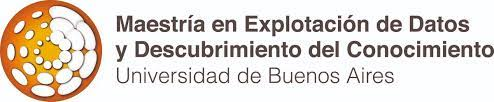

##      **_Data mining en Ciencia y Tecnología_**
#                2do cuatrimestre 2023

Clustering de Imágenes

In [ ]:
# for loading/processing the images
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils  import load_img
from tensorflow.keras.utils import img_to_array

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
#import pickle

In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [ ]:
def preprocess(lista, model):
    datays = {}
    for i in lista:
      featuress = extract_features(i, model)
      datays[i] = featuress
    # lista de filenames
    filenmss = np.array(list(datays.keys()))

    # lista de features
    featsss = np.array(list(datays.values()))

    # reshape 4096 features por el número de imagens
    print(featsss.shape)
    featsss = featsss.reshape(-1,4096)
    return filenmss, featsss

In [ ]:
def extract_features(file, model):
    # levanta imagen como array 224x224
    img = load_img(file, target_size=(224,224))
    # convierte img a numpy array (originalmente es 'PIL.Image.Image')
    img = np.array(img)
    # reshape para tener formato necesario para el modelo (num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepara imagen para modelo (función de keras)
    imgx = preprocess_input(reshaped_img)
    # extrae features
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
# function that lets you view a cluster (based on identifier)
def view_cluster(gps,cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = gps
    # only allow up to 30 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.title('Cluster n:' + str(cluster))
        plt.axis('off')

In [ ]:
# Accessing My Google Drive
# Lista de archivos de flores
# Mismo codigo que el pre-TP
from google.colab import drive
drive.mount('/content/drive')
!gdown --id
image_path = "/content/drive/MyDrive/00_Docencia/0001_DMCT/2023_DMCT/Clases/kaggle_flower_images" #PONER EL PATH DE CADA UNO
# image_path = "kaggle_flower_images" #PONER EL PATH DE CADA UNO
path = sorted([os.path.join(image_path, file)
for file in os.listdir(image_path )
if file.endswith('.png')])

print(len(path))
print(path[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
usage: gdown
       [-h]
       [-V]
       [-O OUTPUT]
       [-q]
       [--fuzzy]
       [--id]
       [--proxy PROXY]
       [--speed SPEED]
       [--no-cookies]
       [--no-check-certificate]
       [--continue]
       [--folder]
       [--remaining-ok]
       url_or_id
gdown: error: the following arguments are required: url_or_id
210
/content/drive/MyDrive/00_Docencia/0001_DMCT/2023_DMCT/Clases/kaggle_flower_images/0001.png


In [ ]:
# Levanta archivos y extrae features
names, feat = preprocess(path, model)

1/1 [==============================] - 0s 412ms/step
(210, 1, 1000)


ValueError: ignored

In [ ]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv(image_path+'/flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

In [ ]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")


Components before PCA: 4096
Components after PCA: 100


In [ ]:
#kmeans = KMeans(n_clusters=len(unique_labels))
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(names,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


Clipping cluster size from 124 to 10
Clipping cluster size from 64 to 10
Clipping cluster size from 22 to 10


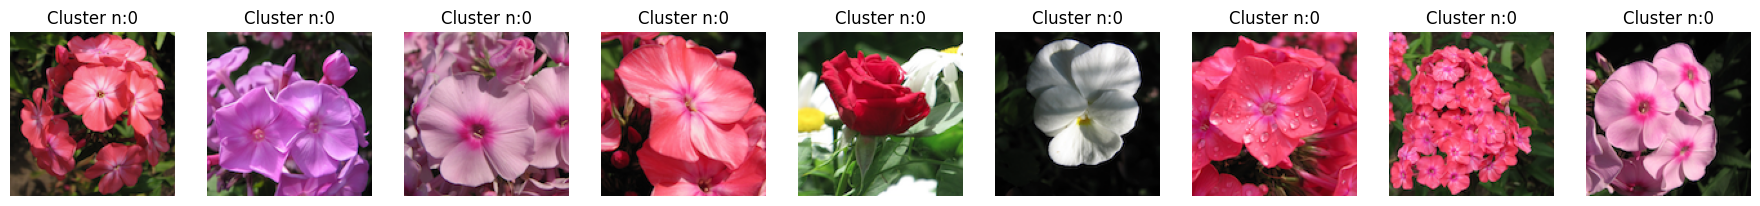

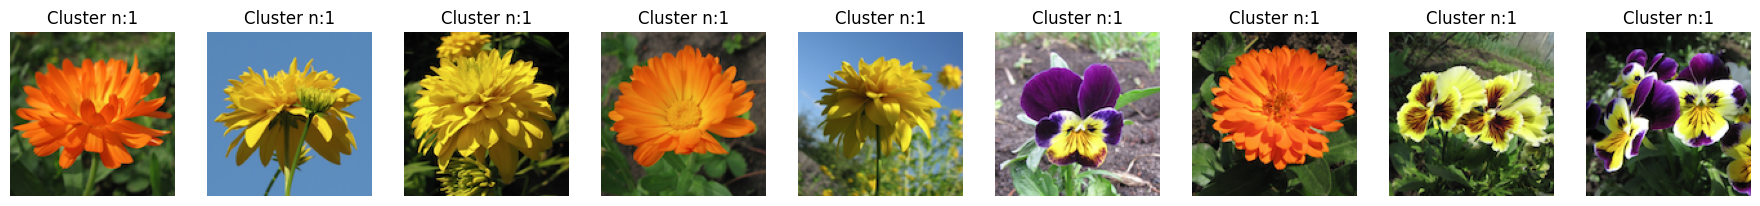

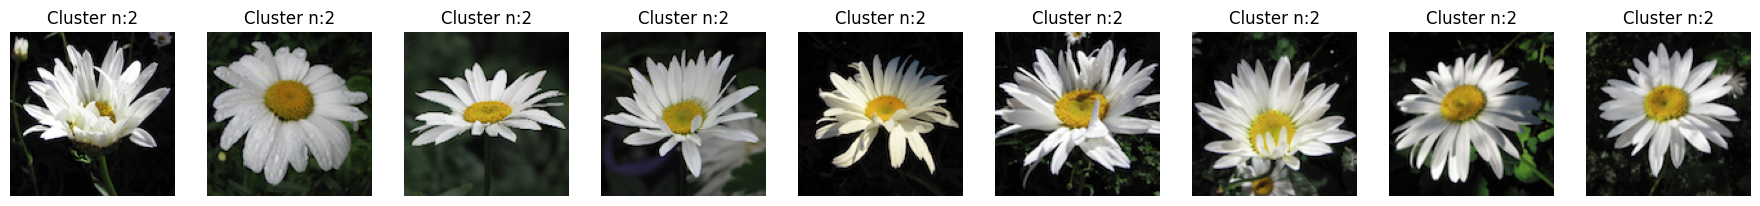

In [ ]:
for n in range(len(groups)):
  view_cluster(groups[n],n)

Text(0, 0.5, 'PC4')

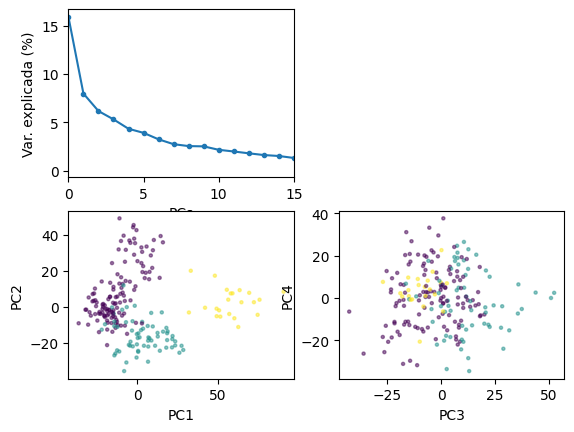

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(100*pca.explained_variance_ / sum(pca.explained_variance_),'.-')
axs[0,0].set_xlim([0,15])
axs[0,0].set_xlabel('PCs')
axs[0,0].set_ylabel('Var. explicada (%)')
axs[0,1].axis('off')

axs[1,0].scatter(x[:,0],x[:,1],s=5,c=kmeans.labels_, alpha=0.5)
axs[1,0].set_xlabel('PC1')
axs[1,0].set_ylabel('PC2')
axs[1,1].scatter(x[:,2],x[:,3],s=5,c=kmeans.labels_, alpha=0.5)
axs[1,1].set_xlabel('PC3')
axs[1,1].set_ylabel('PC4')


array([0.1465144 , 0.0734955 , 0.05686278, 0.04898817, 0.04002077,
       0.03615344, 0.02998481, 0.02538005, 0.02356788, 0.02331262,
       0.02003897, 0.01843786, 0.01670933, 0.01506705, 0.01415137,
       0.01228614, 0.0119281 , 0.0110921 , 0.01039468, 0.00999745,
       0.00989868, 0.00897961, 0.0085643 , 0.00824584, 0.0077621 ,
       0.00765835, 0.00703752, 0.00664643, 0.00637172, 0.00620928,
       0.00613642, 0.00591918, 0.0058135 , 0.0055824 , 0.00530628,
       0.00516881, 0.00508471, 0.00485395, 0.00477958, 0.00456729,
       0.00437062, 0.00426934, 0.00413788, 0.00411174, 0.00406082,
       0.00384662, 0.00372062, 0.00362516, 0.0035212 , 0.00340214,
       0.00337164, 0.00330473, 0.00318502, 0.00312766, 0.00308445,
       0.00298414, 0.00289396, 0.002836  , 0.00280773, 0.00275954,
       0.00270904, 0.0026278 , 0.00257688, 0.00252627, 0.00248136,
       0.00241185, 0.00233777, 0.00232185, 0.00228666, 0.00224989,
       0.00221033, 0.00211345, 0.00210565, 0.00208365, 0.00205